# Data import for resonant gluon fusion

## Import

In [1]:
# uncomment below and run if lumin is not installed
# !pip install lumin

In [2]:
# uncomment below and run if uproot3 is not installed
# pip install uproot3

In [3]:
# !pip show lumin

In [4]:
#cprint(sys.path)

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os
import sys
import uproot3
import pandas as pd
    
from sklearn.model_selection import train_test_split

sys.path.append('../../')
from modules.data_import import *
#from modules.basics import *
#from modules.model_export import *
from modules.features import *

### Data

In [2]:
"""
Initialize some variables to be taken as arguements later - currently unsure what samples
"""
mass_cut = False
mass_eff = 90
res_mass = [260, 270, 300, 350, 400, 450, 500, 550, 600, 650, 750, 800, 1000]
res_mass2 = [1250, 1500, 1750, 2000, 2500, 3000]
sig_str = ['GluGluToRadionToHHTo2B2ZTo2L2J_M-'+str(i)+'_narrow_13TeV-madgraph-v2' for i in res_mass]
for val in res_mass2:
    sig_str.append('GluGluToRadionToHHTo2B2ZTo2L2J_M-'+str(val)+'_narrow_TuneCUETP8M1_PSWeights_13TeV-madgraph-pythia8')

# print('samples: ', samples)
# print('use_feats: ', use_feats)

In [7]:
sig_str

['GluGluToRadionToHHTo2B2ZTo2L2J_M-260_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-270_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-300_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-350_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-400_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-450_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-500_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-550_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-600_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-650_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-750_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-800_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-1000_narrow_13TeV-madgraph-v2',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-1250_narrow_TuneCUETP8M1_PSWeights_13TeV-madgraph-pythia8',
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-1500_narrow

In [37]:
# path to data files
PATH = Path('../../../MC')

In [3]:
"""
New, more efficient, import method as compared to what we did in the binary classification example
"""
#signal = {'GluGluToRadionToHHTo2B2ZTo2L2J_M-'+str(i)+'_narrow_13TeV-madgraph-v2': uproot3.open(PATH/('GluGluToRadionToHHTo2B2ZTo2L2J_M-'+str(i)+'_narrow_13TeV-madgraph-v2.root'))["Events"] for i in res_mass}
signal = {sig: uproot3.open(PATH/(sig+'.root'))["Events"] for sig in sig_str}
background = {i: uproot3.open(PATH/(i+'.root'))["Events"] for i in\
              ['DYJetsToLL_M-10to50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8', 'DYToLL_0J_13TeV-amcatnloFXFX-pythia8',\
               'DYToLL_1J_13TeV-amcatnloFXFX-pythia8','DYToLL_2J_13TeV-amcatnloFXFX-pythia8']}
print(background)
signal

{'DYJetsToLL_M-10to50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8': <TTree b'Events' at 0x02ea0c4c5580>, 'DYToLL_0J_13TeV-amcatnloFXFX-pythia8': <TTree b'Events' at 0x02ea1464f4f0>, 'DYToLL_1J_13TeV-amcatnloFXFX-pythia8': <TTree b'Events' at 0x02ea1ca130d0>, 'DYToLL_2J_13TeV-amcatnloFXFX-pythia8': <TTree b'Events' at 0x02ea322fee80>}


{'GluGluToRadionToHHTo2B2ZTo2L2J_M-260_narrow_13TeV-madgraph-v2': <TTree b'Events' at 0x02e9bb6942b0>,
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-270_narrow_13TeV-madgraph-v2': <TTree b'Events' at 0x02e9c20bc190>,
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-300_narrow_13TeV-madgraph-v2': <TTree b'Events' at 0x02e9c609adf0>,
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-350_narrow_13TeV-madgraph-v2': <TTree b'Events' at 0x02e9ca83d130>,
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-400_narrow_13TeV-madgraph-v2': <TTree b'Events' at 0x02e9cfeb8df0>,
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-450_narrow_13TeV-madgraph-v2': <TTree b'Events' at 0x02e9d61c44f0>,
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-500_narrow_13TeV-madgraph-v2': <TTree b'Events' at 0x02e9dd1bdd90>,
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-550_narrow_13TeV-madgraph-v2': <TTree b'Events' at 0x02e9e46f83d0>,
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-600_narrow_13TeV-madgraph-v2': <TTree b'Events' at 0x02e9ec902820>,
 'GluGluToRadionToHHTo2B2ZTo2L2J_M-650_narrow_13TeV-madgraph-v2': <TTree 

In [4]:
feats = ["Higgsbb_cand_pt","Zjet_cand_pt",
            "leading_Hbb_pt","trailing_Hbb_pt","leading_jet_pt","trailing_jet_pt",
            "Higgsbb_cand_mass","HiggsZZ_cand_mass","Zlep_cand_mass",
            "Zjet_cand_mass","Zlep_cand_pt",         
            "dR_l1j1","dR_l1j2","dR_l1b1","dR_l1b2",
            "dR_l2j1","dR_l2j2","dR_l2b1","dR_l2b2",
            "dR_j1j2","dR_b1b2"]

# these are the extra variables (outside the selected variables) used for preselection cut
pre_feats = ["ngood_bjets", "leading_lep_pt", "trailing_lep_pt", "lep_category"]

In [5]:
"""
Create our signal and background DataFrames
This can be made more efficient by appending a list then making a DataFrame rather than appending a df in a loop
"""
res_mass += res_mass2
# create signal DataFrame
for i, tree in enumerate(signal.values()):
    if i == 0:
        pre_sig_df = tree.pandas.df(feats+pre_feats)
        pre_sig_df['res_mass'] = res_mass[i]
    else:
        add_df = tree.pandas.df(feats+pre_feats)
        add_df['res_mass'] = res_mass[i]
        pre_sig_df = pre_sig_df.append(add_df, ignore_index=True)
print('shape of signal df before preselection cuts: {}'.format(pre_sig_df.shape))
        
# create background DataFrame
for i, tree in enumerate(background.values()):
    if i == 0:
        pre_bkg_df = tree.pandas.df(feats+pre_feats)
        pre_bkg_df['res_mass'] = np.nan
    else:
        add_df = tree.pandas.df(feats+pre_feats)
        add_df['res_mass'] = np.nan
        pre_bkg_df = pre_bkg_df.append(add_df, ignore_index=True)
print('shape of background df before preselection cuts: {}'.format(pre_bkg_df.shape))

shape of signal df before preselection cuts: (913035, 26)
shape of background df before preselection cuts: (1682102, 26)


In [6]:
"""
Apply preselection cuts, drop uneeded features
"""
sig_df = pd.DataFrame(pre_sig_df.loc[(pre_sig_df.ngood_bjets > 0) & (pre_sig_df.lep_category == 2) & (pre_sig_df.Zlep_cand_mass > 15) &
                                     (pre_sig_df.leading_lep_pt > 20) & (pre_sig_df.trailing_lep_pt > 10) & (pre_sig_df.leading_Hbb_pt > 20) &
                                     (pre_sig_df.trailing_Hbb_pt > 20) & (pre_sig_df.leading_jet_pt > 20) & (pre_sig_df.trailing_jet_pt > 20)])
bkg_df = pd.DataFrame(pre_bkg_df.loc[(pre_bkg_df.ngood_bjets > 0) & (pre_bkg_df.lep_category == 2) & (pre_bkg_df.Zlep_cand_mass > 15) & 
                                     (pre_bkg_df.leading_lep_pt > 20) & (pre_bkg_df.trailing_lep_pt > 10) & (pre_bkg_df.leading_Hbb_pt > 20) &
                                     (pre_bkg_df.trailing_Hbb_pt > 20) & (pre_bkg_df.leading_jet_pt > 20) & (pre_bkg_df.trailing_jet_pt > 20)])

# drop preselection features that are not in our desired features
sig_df.drop(columns=[f for f in pre_feats], inplace=True)
bkg_df.drop(columns=[f for f in pre_feats], inplace=True)

print('shape of signal df after preselection cuts: {}'.format(sig_df.shape))
print('shape of background df after preselection cuts: {}'.format(bkg_df.shape))

shape of signal df after preselection cuts: (536927, 22)
shape of background df after preselection cuts: (970952, 22)


In [7]:
"""
Add signal/background flags and renormalize? - renormalization may be done at the weight balance section later
"""
# now we append the data frames to add signal/background flags
sig_df['Label'] = 1
# df2.head()
bkg_df['Label'] = 0
# df3.head()

# normalize signal/background weights separately
# sig_df.weight_central /= sig_df.weight_central.sum()
# bkg_df.weight_central /= bkg_df.weight_central.sum()

In [8]:
"""
Append signal and background now and rename some features for LUMIN
split the full MC data into two sets based off event_id being even or odd
"""
df_0 = sig_df[::2].append(bkg_df[::2], ignore_index=True)
df_1 = sig_df[1::2].append(bkg_df[1::2], ignore_index=True)
df_0.rename(index=str, columns={'Label':'gen_target', 'weight_central':'gen_weight'}, inplace=True)
df_1.rename(index=str, columns={'Label':'gen_target', 'weight_central':'gen_weight'}, inplace=True)

# add weights=1 for now
df_0['gen_weight'] = 1
df_1['gen_weight'] = 1

df_0

,Higgsbb_cand_pt,Zjet_cand_pt,leading_Hbb_pt,trailing_Hbb_pt,leading_jet_pt,trailing_jet_pt,Higgsbb_cand_mass,HiggsZZ_cand_mass,Zlep_cand_mass,Zjet_cand_mass,...,dR_l1b2,dR_l2j1,dR_l2j2,dR_l2b1,dR_l2b2,dR_j1j2,dR_b1b2,res_mass,gen_target,gen_weight
0,25.848679,26.120621,39.472450,63.628258,39.472450,33.727741,106.150146,181.896240,100.056335,75.526207,...,2.618090,2.265886,1.009017,2.265886,1.064610,2.534173,3.004378,260.0,1,1
1,59.459953,65.916573,50.466309,74.658943,50.466309,31.186321,116.356743,173.951752,92.635788,51.746193,...,1.248766,1.624251,1.830606,1.624251,3.075878,1.354130,2.284670,260.0,1,1
2,55.712330,65.577744,68.148193,50.327293,50.327293,32.117615,318.720062,439.046021,59.171967,267.048492,...,4.213823,3.561016,2.971262,2.013757,3.561016,4.024919,4.005995,260.0,1,1
3,56.649464,43.156364,57.434151,49.749397,58.582058,49.749397,148.345657,243.141861,90.107475,100.978935,...,1.331823,2.105248,2.768541,0.726568,2.768541,2.346479,2.768961,260.0,1,1
4,154.628021,71.576065,94.996071,59.744556,44.028400,40.830479,121.376778,129.315674,36.130470,51.410828,...,1.275808,3.152848,1.964770,0.919964,1.269128,1.220282,1.451763,260.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753935,43.730404,30.149199,63.872032,44.735886,44.735886,32.877800,112.188736,224.554794,91.359970,75.270523,...,1.798264,1.924968,3.829440,1.986866,1.924968,2.459142,2.555615,NaN,0,1
753936,434.428558,66.520546,135.247711,299.966736,64.787346,30.559061,123.100342,210.284790,88.998474,72.066040,...,3.055525,0.881588,1.842066,2.853240,2.833316,1.797041,0.577044,NaN,0,1
753937,111.127167,74.676292,51.527126,111.575714,51.527126,35.231758,129.960114,308.096283,90.722229,92.887772,...,2.662160,3.134107,2.611669,3.134107,1.432998,1.974616,1.902108,NaN,0,1
753938,51.697929,26.347561,73.186867,54.993313,54.993313,31.247038,119.441147,410.514130,114.994179,97.152908,...,1.862514,3.611549,3.496206,2.769115,3.611549,3.075519,2.367365,NaN,0,1


In [9]:
df_1

,Higgsbb_cand_pt,Zjet_cand_pt,leading_Hbb_pt,trailing_Hbb_pt,leading_jet_pt,trailing_jet_pt,Higgsbb_cand_mass,HiggsZZ_cand_mass,Zlep_cand_mass,Zjet_cand_mass,...,dR_l1b2,dR_l2j1,dR_l2j2,dR_l2b1,dR_l2b2,dR_j1j2,dR_b1b2,res_mass,gen_target,gen_weight
0,77.721176,76.596512,69.320518,74.152992,69.320518,55.021515,131.652390,329.417511,88.922005,200.683212,...,2.674538,2.398474,3.095726,2.398474,0.789604,2.931537,2.102475,260.0,1,1
1,65.705399,73.022705,65.125267,44.204594,41.410126,32.827007,90.771812,152.384125,84.187370,20.873796,...,2.354937,1.957626,2.012411,2.569969,1.844855,0.484931,1.924195,260.0,1,1
2,45.861378,77.888885,89.473907,44.562679,44.562679,34.897087,127.741455,129.872803,29.830544,62.846523,...,2.360458,1.300818,1.296737,1.804494,1.300818,1.417742,2.995182,260.0,1,1
3,43.117905,98.533394,48.535049,54.263649,57.014786,48.535049,123.177086,399.864746,92.935753,135.115417,...,1.226281,3.738478,2.186952,2.186952,2.515474,2.189028,2.690287,260.0,1,1
4,112.621101,8.556396,59.318214,58.510258,58.510258,50.342659,47.675030,304.306549,60.240067,198.731461,...,2.225713,2.918385,3.394127,2.970508,2.918385,3.927382,0.741022,260.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753934,100.304398,38.559612,70.659172,32.072918,55.859406,39.191914,28.815432,183.258408,74.075218,91.275040,...,3.185792,1.446477,2.568506,3.985336,3.849673,2.429707,0.488949,NaN,0,1
753935,57.325520,68.216660,44.418564,33.341022,49.128315,35.716869,56.155846,301.395935,94.618568,53.083687,...,1.566736,3.127859,3.917361,1.281924,2.840959,1.298032,1.563198,NaN,0,1
753936,55.943081,2.115174,34.431164,41.204178,34.431164,33.497936,52.854061,344.990479,91.840141,199.363953,...,0.786591,2.794134,2.036267,2.794134,2.872006,4.648074,1.498141,NaN,0,1
753937,68.234779,60.026505,40.206223,30.055862,44.858803,30.055862,143.049149,200.993698,94.056686,55.068115,...,1.559332,0.620484,0.937657,2.593860,0.937657,1.530702,2.960225,NaN,0,1


In [10]:
# define the same sets of features as in the binary classification example
targ_feat = 'gen_target'
gen_feats = [f for f in df_1.columns if 'gen_' in f]
misc_feats = []
wgt_feat = 'gen_weight'
cat_feats = []
cont_feats = [f for f in df_1.columns if f not in gen_feats+cat_feats+misc_feats]
print(len(cat_feats), cat_feats)
print(len(cont_feats), cont_feats)
train_feats = cont_feats + cat_feats

0 []
22 ['Higgsbb_cand_pt', 'Zjet_cand_pt', 'leading_Hbb_pt', 'trailing_Hbb_pt', 'leading_jet_pt', 'trailing_jet_pt', 'Higgsbb_cand_mass', 'HiggsZZ_cand_mass', 'Zlep_cand_mass', 'Zjet_cand_mass', 'Zlep_cand_pt', 'dR_l1j1', 'dR_l1j2', 'dR_l1b1', 'dR_l1b2', 'dR_l2j1', 'dR_l2j2', 'dR_l2b1', 'dR_l2b2', 'dR_j1j2', 'dR_b1b2', 'res_mass']


To create our validation set, we'll eventually pull out a random sample, however it can be useful to ensure as much similarity as possible by doing a stratified split using the categories and classes in the data. `ids2unique` maps each set of categories to a unique integer, allowing us to create a single set of values to use as the stratification key.

In [11]:
# Again, we need the 'strat_key' feature as in the binary classification example

from lumin.utils.misc import ids2unique
df_0['gen_strat_key'] = ids2unique(df_0[[targ_feat] + cat_feats].values)
df_0.rename(index=str, columns={'strat_key':'gen_strat_key'}, inplace=True)
df_1['gen_strat_key'] = ids2unique(df_1[[targ_feat] + cat_feats].values)
df_1.rename(index=str, columns={'strat_key':'gen_strat_key'}, inplace=True)

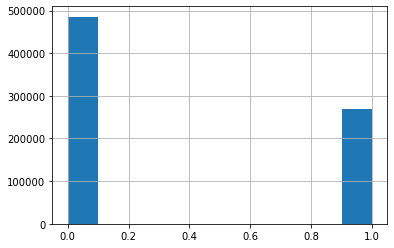

In [12]:
"""
Plots the binary target for both DataFrames
"""
df_0.gen_target.hist()

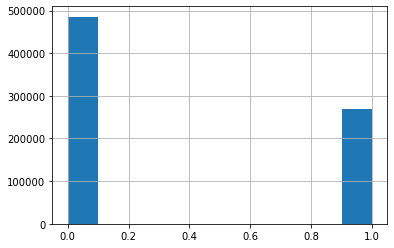

In [13]:
df_1.gen_target.hist()

In [14]:
df_0.gen_weight.describe()

count    753940.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: gen_weight, dtype: float64

In [15]:
df_0.res_mass.unique()

array([ 260.,  270.,  300.,  350.,  400.,  450.,  500.,  550.,  600.,
        650.,  750.,  800., 1000., 1250., 1500., 1750., 2000., 2500.,
       3000.,   nan])

# > *Setup the features same as in the binary classification example* <
## Features

In [16]:
cat_feats

[]

In [17]:
len(cont_feats), cont_feats

(22,
 ['Higgsbb_cand_pt',
  'Zjet_cand_pt',
  'leading_Hbb_pt',
  'trailing_Hbb_pt',
  'leading_jet_pt',
  'trailing_jet_pt',
  'Higgsbb_cand_mass',
  'HiggsZZ_cand_mass',
  'Zlep_cand_mass',
  'Zjet_cand_mass',
  'Zlep_cand_pt',
  'dR_l1j1',
  'dR_l1j2',
  'dR_l1b1',
  'dR_l1b2',
  'dR_l2j1',
  'dR_l2j2',
  'dR_l2b1',
  'dR_l2b2',
  'dR_j1j2',
  'dR_b1b2',
  'res_mass'])

## Resonant Mass

In [18]:
"""
add_bkg_res_mass() is interesting - in the given DataFrame, it sets the background 'res_mass' feature vector equal to
randomly chosen values from the unique set of values from the DataFrames signal 'res_mass' feature. It then copies
the entire column of 'res_mass' from the DataFrame into a new column 'int_res_mass'

essentially gives a random spread of mass points to the background of the dataframe
"""
add_bkg_res_mass(df_0)
add_bkg_res_mass(df_1)

In [19]:
# check to see if NaN's are now gone
df_0.res_mass.unique()

array([ 260.,  270.,  300.,  350.,  400.,  450.,  500.,  550.,  600.,
        650.,  750.,  800., 1000., 1250., 1500., 1750., 2000., 2500.,
       3000.])

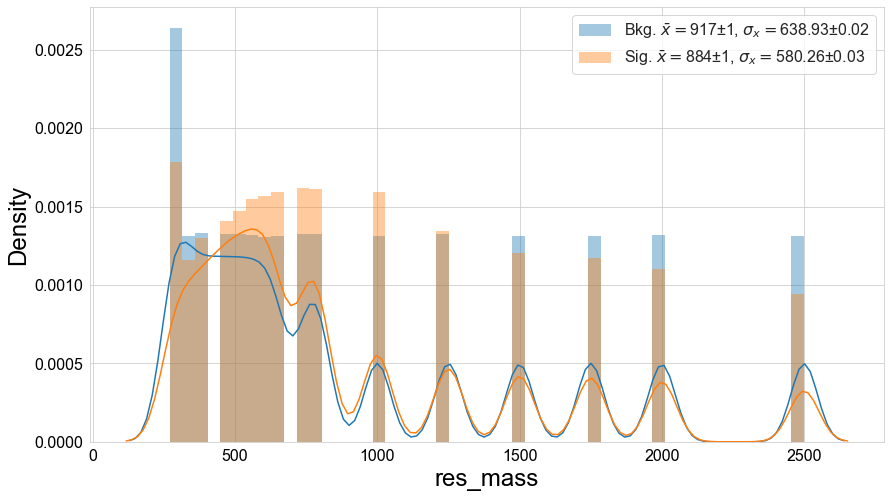

In [20]:
"""
Only goes up to 900GeV?
"""
from lumin.plotting.data_viewing import plot_feat
plot_feat(df_0, 'res_mass', cuts=[(df_0.gen_target==0),(df_0.gen_target==1)], labels=['Bkg.', 'Sig.'])

In [21]:
df_0['res_mass_orig'] = df_0['res_mass']
df_1['res_mass_orig'] = df_1['res_mass']

## Data preprocessing 

In [22]:
input_pipe_0 = fit_input_pipe(df_0, cont_feats, PATH/f'input_pipe_0')
input_pipe_1 = fit_input_pipe(df_1, cont_feats, PATH/f'input_pipe_1')

In [23]:
set_0_train = df_0.copy()
set_1_train = df_1.copy()
set_0_test  = df_0.copy()
set_1_test  = df_1.copy()

In [24]:
set_0_train[cont_feats] = input_pipe_0.transform(set_0_train[cont_feats].values.astype('float32'))
set_1_train[cont_feats] = input_pipe_1.transform(set_1_train[cont_feats].values.astype('float32'))

In [25]:
set_0_test[cont_feats] = input_pipe_1.transform(set_0_test[cont_feats].values.astype('float32'))
set_1_test[cont_feats] = input_pipe_0.transform(set_1_test[cont_feats].values.astype('float32'))

## Weight balancing

In [26]:
set_0_train

,Higgsbb_cand_pt,Zjet_cand_pt,leading_Hbb_pt,trailing_Hbb_pt,leading_jet_pt,trailing_jet_pt,Higgsbb_cand_mass,HiggsZZ_cand_mass,Zlep_cand_mass,Zjet_cand_mass,...,dR_l2b1,dR_l2b2,dR_j1j2,dR_b1b2,res_mass,gen_target,gen_weight,gen_strat_key,int_res_mass,res_mass_orig
0,-0.638062,-0.839167,-0.458105,-0.286695,-0.664519,-0.498264,-0.343963,-0.771563,0.678148,-0.513717,...,-0.194736,-1.420388,0.394262,0.816574,-0.951514,1,1,2,260.0,260.0
1,-0.487868,-0.398905,-0.395546,-0.201752,-0.533749,-0.610664,-0.294686,-0.805960,0.396813,-0.720493,...,-0.892788,0.740832,-0.801193,0.148240,-0.951514,1,1,2,260.0,260.0
2,-0.504615,-0.402653,-0.294930,-0.389121,-0.535402,-0.569475,0.682316,0.341817,-0.871901,1.151643,...,-0.469034,1.262140,1.904476,1.746694,-0.951514,1,1,2,260.0,260.0
3,-0.500427,-0.650701,-0.355896,-0.393571,-0.437213,0.210334,-0.140245,-0.506388,0.300957,-0.292396,...,-1.869401,0.410581,0.204117,0.597961,-0.951514,1,1,2,260.0,260.0
4,-0.062605,-0.336294,-0.142156,-0.316602,-0.610326,-0.184128,-0.270449,-0.999221,-1.745474,-0.723410,...,-1.659000,-1.200622,-0.936788,-0.625213,-0.951514,1,1,2,260.0,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753935,-0.558157,-0.794599,-0.319262,-0.432178,-0.601911,-0.535854,-0.314809,-0.586864,0.348443,-0.515940,...,-0.498289,-0.495885,0.318251,0.399844,0.053156,0,1,1,1000.0,1000.0
753936,1.187698,-0.392223,0.086891,1.533256,-0.363402,-0.638406,-0.262128,-0.648649,0.258911,-0.543804,...,0.444262,0.480186,-0.352497,-1.437493,2.089648,0,1,1,2500.0,2500.0
753937,-0.256991,-0.301996,-0.389509,0.082529,-0.521130,-0.431745,-0.229009,-0.225155,0.324264,-0.362751,...,0.749824,-1.024534,-0.172603,-0.207014,-0.829324,0,1,1,350.0,350.0
753938,-0.522553,-0.836657,-0.266258,-0.353190,-0.479901,-0.607979,-0.279794,0.218283,1.244487,-0.325664,...,0.352741,1.316440,0.942678,0.225032,0.731987,0,1,1,1500.0,1500.0


In [27]:
"""
Redefined the check_weights and balance_weights_resonant methods since we have different features
"""
# balance_weights_resonant?
# balance_weights_resonant(set_train)

def check_weights_resonant(df:pd.DataFrame) -> None:
    v = []
    for m in df.int_res_mass.unique():
        v.append(df.loc[(df.gen_target == 1) & (df.int_res_mass==m), 'gen_weight'].sum())
        print(m, 'sum', v[-1])
    print(f'res mass std {np.std(v):.2f}')

def new_balance_weights_resonant(df:pd.DataFrame) -> None:
    print('Initial weight sums')
    check_weights_resonant(df)
    df['gen_orig_weight'] = df['gen_weight']
    for t in df.gen_target.unique():
        for m in df.int_res_mass.unique():
            df.loc[(df.gen_target == t) & (df.int_res_mass == m), 'gen_weight'] \
                /= np.sum(df.loc[(df.gen_target == t) & (df.int_res_mass == m), 'gen_weight'])

    print('\nFinal weight sums')
    check_weights_resonant(df)

In [28]:
new_balance_weights_resonant(set_0_train)

Initial weight sums
260.0 sum 8716
270.0 sum 9356
300.0 sum 10928
350.0 sum 13149
400.0 sum 14752
450.0 sum 16018
500.0 sum 16720
550.0 sum 17602
600.0 sum 17827
650.0 sum 18139
750.0 sum 18404
800.0 sum 18343
1000.0 sum 18124
1250.0 sum 15282
1500.0 sum 13711
1750.0 sum 13354
2000.0 sum 12543
2500.0 sum 10688
3000.0 sum 4808
res mass std 3777.43

Final weight sums
260.0 sum 1.0000000000000002
270.0 sum 0.9999999999999998
300.0 sum 1.0
350.0 sum 1.0
400.0 sum 1.0
450.0 sum 1.0
500.0 sum 1.0
550.0 sum 1.0
600.0 sum 1.0000000000000002
650.0 sum 1.0
750.0 sum 1.0000000000000004
800.0 sum 1.0000000000000004
1000.0 sum 0.9999999999999998
1250.0 sum 1.0000000000000004
1500.0 sum 1.0
1750.0 sum 1.0
2000.0 sum 1.0
2500.0 sum 1.0
3000.0 sum 1.0
res mass std 0.00


In [29]:
new_balance_weights_resonant(set_1_train)

Initial weight sums
260.0 sum 8716
270.0 sum 9355
300.0 sum 10928
350.0 sum 13149
400.0 sum 14753
450.0 sum 16017
500.0 sum 16721
550.0 sum 17601
600.0 sum 17827
650.0 sum 18140
750.0 sum 18404
800.0 sum 18343
1000.0 sum 18123
1250.0 sum 15283
1500.0 sum 13711
1750.0 sum 13353
2000.0 sum 12543
2500.0 sum 10689
3000.0 sum 4807
res mass std 3777.58

Final weight sums
260.0 sum 1.0000000000000002
270.0 sum 1.0
300.0 sum 1.0
350.0 sum 1.0
400.0 sum 0.9999999999999997
450.0 sum 1.0
500.0 sum 0.9999999999999999
550.0 sum 0.9999999999999999
600.0 sum 1.0000000000000002
650.0 sum 1.0000000000000002
750.0 sum 1.0000000000000004
800.0 sum 1.0000000000000004
1000.0 sum 1.0000000000000002
1250.0 sum 0.9999999999999997
1500.0 sum 1.0
1750.0 sum 0.9999999999999999
2000.0 sum 1.0
2500.0 sum 0.9999999999999998
3000.0 sum 1.0
res mass std 0.00


## Saving

In [38]:
# df2foldfile(df=set_0_train, n_folds=10,
#             cont_feats=cont_feats, cat_feats=cat_feats, targ_feats='gen_target', wgt_feat='gen_weight',
#             misc_feats=['channel', 'gen_sample', 'gen_orig_weight', 'jet_cat', 'gen_strat_key', 'res_mass_orig'],
#             savename=PATH/'train_0', targ_type='int', strat_key='gen_strat_key')

df2foldfile(df=set_0_train, n_folds=10,
            cont_feats=cont_feats, cat_feats=cat_feats, targ_feats='gen_target', wgt_feat='gen_weight',
            misc_feats=['gen_orig_weight', 'gen_strat_key', 'res_mass_orig'],
            savename=PATH/'train_0', targ_type='int', strat_key='gen_strat_key')

Saving fold 0 with 75394 events
Saving fold 1 with 75394 events
Saving fold 2 with 75394 events
Saving fold 3 with 75394 events
Saving fold 4 with 75394 events
Saving fold 5 with 75394 events
Saving fold 6 with 75394 events
Saving fold 7 with 75394 events
Saving fold 8 with 75394 events
Saving fold 9 with 75394 events


In [39]:
# df2foldfile(df=set_1_train, n_folds=10,
#             cont_feats=cont_feats, cat_feats=cat_feats, targ_feats='gen_target', wgt_feat='gen_weight',
#             misc_feats=['channel', 'gen_sample', 'gen_orig_weight', 'jet_cat', 'gen_strat_key', 'res_mass_orig'],
#             savename=PATH/'train_1', targ_type='int', strat_key='gen_strat_key')

df2foldfile(df=set_1_train, n_folds=10,
            cont_feats=cont_feats, cat_feats=cat_feats, targ_feats='gen_target', wgt_feat='gen_weight',
            misc_feats=['gen_orig_weight', 'gen_strat_key', 'res_mass_orig'],
            savename=PATH/'train_1', targ_type='int', strat_key='gen_strat_key')

Saving fold 0 with 75394 events
Saving fold 1 with 75394 events
Saving fold 2 with 75394 events
Saving fold 3 with 75394 events
Saving fold 4 with 75394 events
Saving fold 5 with 75394 events
Saving fold 6 with 75394 events
Saving fold 7 with 75394 events
Saving fold 8 with 75394 events
Saving fold 9 with 75393 events


In [40]:
# df2foldfile(df=set_0_test, n_folds=10,
#             cont_feats=cont_feats, cat_feats=cat_feats, targ_feats='gen_target', wgt_feat='gen_weight',
#             misc_feats=['channel', 'gen_sample', 'jet_cat', 'gen_strat_key', 'mva_score', 'res_mass_orig'],
#             savename=PATH/'test_0', targ_type='int', strat_key='gen_strat_key')

df2foldfile(df=set_0_test, n_folds=10,
            cont_feats=cont_feats, cat_feats=cat_feats, targ_feats='gen_target', wgt_feat='gen_weight',
            misc_feats=['gen_strat_key', 'res_mass_orig'],
            savename=PATH/'test_0', targ_type='int', strat_key='gen_strat_key')

Saving fold 0 with 75394 events
Saving fold 1 with 75394 events
Saving fold 2 with 75394 events
Saving fold 3 with 75394 events
Saving fold 4 with 75394 events
Saving fold 5 with 75394 events
Saving fold 6 with 75394 events
Saving fold 7 with 75394 events
Saving fold 8 with 75394 events
Saving fold 9 with 75394 events


In [41]:
# df2foldfile(df=set_1_test, n_folds=10,
#             cont_feats=cont_feats, cat_feats=cat_feats, targ_feats='gen_target', wgt_feat='gen_weight',
#             misc_feats=['channel', 'gen_sample', 'jet_cat', 'gen_strat_key', 'mva_score', 'res_mass_orig'],
#             savename=PATH/'test_1', targ_type='int', strat_key='gen_strat_key')

df2foldfile(df=set_1_test, n_folds=10,
            cont_feats=cont_feats, cat_feats=cat_feats, targ_feats='gen_target', wgt_feat='gen_weight',
            misc_feats=['gen_strat_key', 'res_mass_orig'],
            savename=PATH/'test_1', targ_type='int', strat_key='gen_strat_key')

Saving fold 0 with 75394 events
Saving fold 1 with 75394 events
Saving fold 2 with 75394 events
Saving fold 3 with 75394 events
Saving fold 4 with 75394 events
Saving fold 5 with 75394 events
Saving fold 6 with 75394 events
Saving fold 7 with 75394 events
Saving fold 8 with 75394 events
Saving fold 9 with 75393 events


In [42]:
PATH

WindowsPath('../../../MC')